In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
vgg = VGG16()

553467904/553467096 [==============================] - 182s 0us/step


In [5]:
print(vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [51]:
# load an image from file
image_pillow = load_img('../img/index.jpg', target_size=(224, 224))

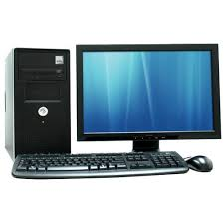

In [52]:
image_pillow

In [53]:
type(image_pillow)

PIL.Image.Image

In [54]:
# convert the image pixels to a numpy array
image_numpy = img_to_array(image_pillow)

In [55]:
type(image_numpy)

numpy.ndarray

In [56]:
image_numpy.shape

(224, 224, 3)

In [57]:
# reshape data for the model
image_reshaped = image_numpy.reshape(
    (1, image_numpy.shape[0], image_numpy.shape[1], image_numpy.shape[2]))

In [58]:
# prepare the image for the VGG model
image = preprocess_input(image_reshaped)

In [59]:
# predict the probability across all output classes
y_pred = vgg.predict(image)

In [60]:
y_pred.shape

(1, 1000)

In [61]:
# convert the probabilities to class labels
decode_predictions(y_pred)

[[('n03180011', 'desktop_computer', 0.88298965),
  ('n04152593', 'screen', 0.04265815),
  ('n03782006', 'monitor', 0.03093565),
  ('n03793489', 'mouse', 0.009991908),
  ('n03832673', 'notebook', 0.009744523)]]